In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn.datasets as skd

In [3]:
data=skd.make_blobs(n_samples=500,n_features=2,centers=3,cluster_std=1.1,random_state=101)
data

(array([[ 4.73209061e+00,  7.07948744e+00],
        [ 1.18962021e+00,  6.33502626e-01],
        [-1.21014609e+00,  1.17210995e+00],
        [-9.00516318e+00, -5.67905816e+00],
        [-9.43157571e+00, -6.42621238e+00],
        [ 1.24576253e+00,  1.25887672e+00],
        [-8.22287925e+00, -6.77763729e+00],
        [ 2.70993578e+00,  1.93875440e-02],
        [ 3.81871261e+00,  5.76382449e+00],
        [-9.74876568e+00, -6.74850279e+00],
        [ 4.31608609e+00,  6.86982821e+00],
        [ 1.79647761e-01,  1.84293236e+00],
        [ 2.69830364e+00,  7.42066996e-01],
        [ 3.04242393e+00,  7.45513500e+00],
        [ 2.61886228e+00,  6.14638021e+00],
        [-1.03839580e+01, -7.28319924e+00],
        [ 5.35537394e-01,  5.78592476e-01],
        [ 2.90097753e-01,  2.17060100e+00],
        [ 2.79936699e+00,  6.76796489e+00],
        [-1.03291123e+01, -6.43505161e+00],
        [-7.31828537e+00, -4.65863964e+00],
        [ 5.08859073e-02,  7.77419453e-01],
        [ 5.55821428e+00,  6.502

In [4]:
df=pd.DataFrame(data[0])
y=pd.Series(data[1])
df['y']=y
df

,0,1,y
0,4.732091,7.079487,2
1,1.189620,0.633503,0
2,-1.210146,1.172110,0
3,-9.005163,-5.679058,1
4,-9.431576,-6.426212,1
...,...,...,...
495,-9.036549,-6.546582,1
496,4.202817,6.887824,2
497,4.539502,7.328461,2
498,-0.612743,3.109541,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   y       500 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.9 KB


In [6]:
df.groupby('y').describe()

0                                                                \
   count      mean       std        min        25%       50%       75%   
y                                                                        
0  167.0  0.268660  1.115662  -2.682722  -0.608643  0.373578  1.049653   
1  167.0 -9.266666  1.222996 -12.275402 -10.172391 -9.291821 -8.295948   
2  166.0  3.851380  1.109949   1.516323   3.093971  3.835770  4.541046   

                 1                                                    \
        max  count      mean       std       min       25%       50%   
y                                                                      
0  3.391483  167.0  1.533059  1.188265 -1.411192  0.627367  1.629255   
1 -6.253443  167.0 -6.670292  1.063916 -9.631930 -7.312828 -6.713572   
2  6.396454  166.0  6.555709  1.198239  3.271085  5.773340  6.547025   

                        
        75%        max  
y                       
0  2.352202   4.156741  
1 -5.942654  -4.238938  
2  7.367299  10.019128

<AxesSubplot:xlabel='0', ylabel='1'>

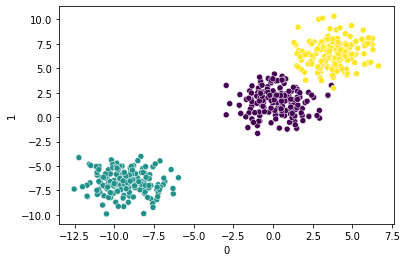

In [35]:
sns.scatterplot(df[0],df[1],c=df['y'])

In [7]:
from sklearn.cluster import KMeans

In [8]:
model=KMeans(n_clusters=3).fit(df.drop('y',axis=1))

In [9]:
model.cluster_centers_

array([[-9.2666663 , -6.67029151],
       [ 3.84862609,  6.53495278],
       [ 0.24984761,  1.52368322]])

In [10]:
model.labels_

array([1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2,
       2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2,

<AxesSubplot:xlabel='0', ylabel='1'>

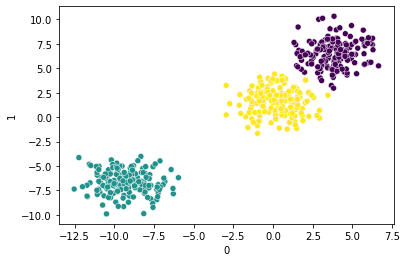

In [45]:
sns.scatterplot(df[0],df[1],c=model.labels_)     #c=====color

In [11]:
sns.set_style('darkgrid')

In [13]:
sns.set_palette('Set2')

Text(0.5, 1.0, 'Kmeans')

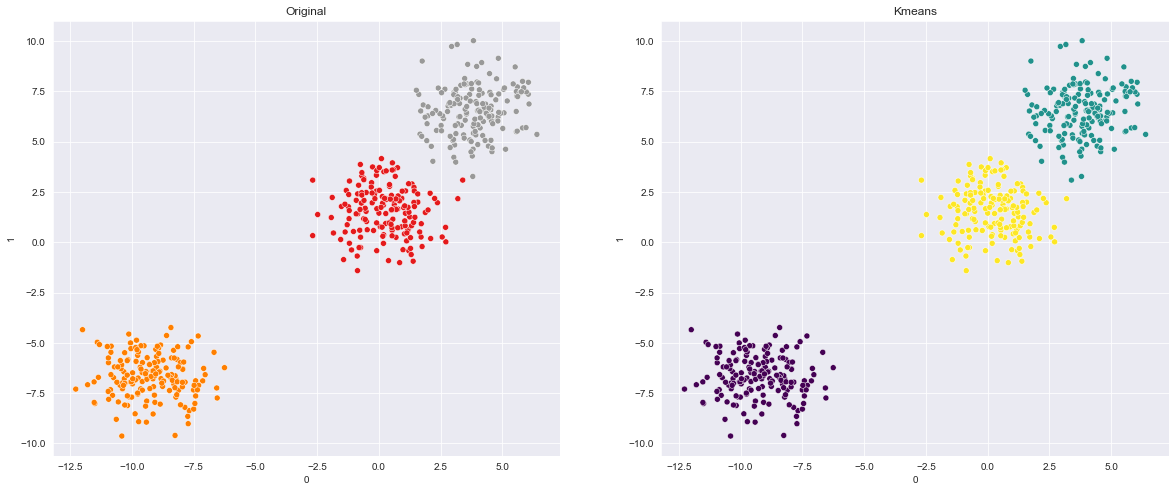

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(df[0],df[1],c=df['y'],cmap='Set1')
plt.title('Original')

plt.subplot(1,2,2)
sns.scatterplot(df[0],df[1],c=model.labels_,cmap='viridis')
plt.title('Kmeans')

In [51]:
model.inertia_

1561.4736315330472

In [53]:
model.score(df.drop('y',axis=1))

-1561.473631533047

In [16]:
ine = []
for i in range(2,100):
    model_i = KMeans(n_clusters=i).fit(df.drop('y',axis=1))
    ine.append(model_i.inertia_)

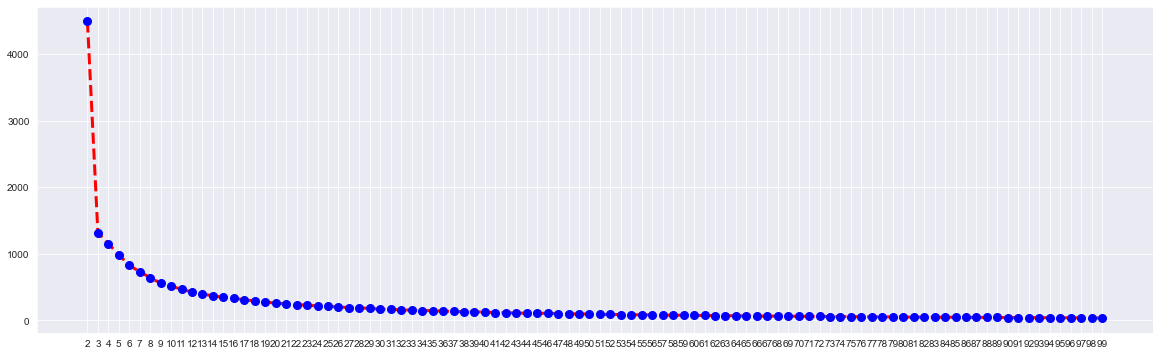

In [17]:
plt.figure(figsize=(20,6))
plt.plot(range(2,100),ine, lw=3,marker='o',markersize=8,ls='--',color='red',markeredgecolor='blue',markerfacecolor='blue')
plt.xticks(range(2,100))
plt.grid(True)